## Abstract

### Olist Marketing Funnel: Customer Segmentation, RFM Modeling, Persuasion Modeling, Targeted Recommendations with controlled A/B Testing, Social Media Analytics

A Data Driven Algorithmic Marketing system for brazil’s biggest online marketplace, to segment customers, to do Cohort Analysis, RFM Modeling, Uplift Modeling, Identify Upselling and Cross Selling opportunities using Targeted Recommendations, Context Aware Recommendation using product Features, Pricing Optimization. 

### Brazilian E-commerce Dataset by Olist

This is a Brazilian ecommerce public dataset of orders made at Olist. The dataset has information of 100k orders from 2016 to 2018 made in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. It also has a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

pd.set_option('max_columns', 50)

np.random.seed(42)
from datetime import datetime, timedelta
%matplotlib inline

In [2]:
os.chdir(r'N:\Digital Marketing Analytics')

### Load the Master Dataframe 

In [3]:
Olist_db = pd.read_csv('Olist_Master.csv')
Olist_db

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,customer_unique_id,review_response_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,Credit Card,2,72.19,Cool Stuff,27277,Volta Redonda,SP,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-29,28013,Campos Dos Goytacazes,RJ,5ee8fe956c2631afc0a1dcc1920d0e3d,1,2017,9,2,8,Wed,Sep
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,1,Boleto,1,73.86,Cool Stuff,27277,Volta Redonda,SP,b11cba360bbe71410c291b764753d37f,5,2017-07-14 00:00:00,2017-07-17 12:50:07,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-07-26,75800,Jatai,GO,8b3f917f4307d3e5cf34c0b43d6e6f50,3,2017,6,2,11,Wed,Jun
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,1,Credit Card,2,83.23,Cool Stuff,27277,Volta Redonda,SP,af01c4017c5ab46df6cc810e069e654a,4,2018-06-05 00:00:00,2018-06-06 21:41:12,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-06-07,30720,Belo Horizonte,MG,69ba88e17ea574da9c9b8c8834a583d1,1,2018,5,4,10,Fri,May
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,1,Credit Card,3,75.07,Cool Stuff,27277,Volta Redonda,SP,8304ff37d8b16b57086fa283fe0c44f8,5,2017-08-10 00:00:00,2017-08-13 03:35:17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-25,83070,Sao Jose Dos Pinhais,PR,cbe063493a222cb17024ff0285b4ecb6,3,2017,8,1,18,Tue,Aug
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,1,Credit Card,4,72.19,Cool Stuff,27277,Volta Redonda,SP,426f43a82185969503fb3c86241a9535,5,2017-08-25 00:00:00,2017-08-28 00:51:18,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-09-01,36400,Conselheiro Lafaiete,MG,ffab5330bd7b40979ab6726b2e02292e,3,2017,8,3,21,Thu,Aug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116576,fdaf98feac227eb978d8f33f36e0231d,1,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,2017-04-27 05:10:28,119.9,16.14,1,Boleto,1,136.04,Furniture Decor,80220,Curitiba,PR,fd48db39884359395ff6f18c8822aa7b,4,2017-05-25 00:00:00,2017-05-26 11:42:36,81ae83ce1a10af9f93fa3512bd9713b1,delivered,2017-04-19 10:20:51,2017-05-22,22793,Rio De Janeiro,RJ,e060eb8f37de232154b24bbb2413b68e,1,2017,4,2,10,Wed,Apr
116577,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.0,16.21,1,Boleto,1,225.21,Electronics,82620,Curitiba,PR,cd6f089e896732c91671704c7f51790e,4,2017-08-18 00:00:00,2017-08-19 13:16:38,94203a446c1b46b5ac95b0aaf7221804,delivered,2017-08-11 10:15:22,2017-09-04,13485,Limeira,SP,3041f5d65c4fa516eed1325d7a8657af,1,2017,8,4,10,Fri,Aug
116578,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,1,Boleto,1,6922.21,Computers,86026,Londrina,PR,ac0c6f54ff4bfc295468eb14f31c927f,1,2018-08-16 00:00:00,2018-08-16 14:20:01,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-08-10,29066,Vitor

In [16]:
# converting date columns to datetime
date_columns = ['shipping_limit_date', 'review_creation_date', 'review_answer_timestamp', 'order_purchase_timestamp', 'order_estimated_delivery_date']
for col in date_columns:
    Olist_db[col] = pd.to_datetime(Olist_db[col], format='%Y-%m-%d %H:%M:%S')

### Cohort Analysis

A cohort is a group of users who share something in common, be it their sign-up date, first purchase, Interests, acquisition channel, etc. Cohort analysis is the method by which these groups are tracked over time, helping you spot trends, understand repeat behaviors (purchases, engagement, amount spent, etc.), and monitor your customer and revenue retention.

When building a cohort analysis, it’s important to consider the relationship between the event or interaction you’re tracking and its relationship to your business model.

#### Determine the user's cohort group (based on their first order)
Create a new column called CohortGroup, which is the year and month in which the user's first purchase occurred.

In [5]:
df = Olist_db[['customer_unique_id', 'order_id', 'order_purchase_timestamp', 'product_category_name', 'customer_state']].drop_duplicates()

In [6]:
df['OrderMonth'] = df['order_purchase_timestamp'].dt.to_period('M')
df['CohortGroup'] = df.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M') 

In [7]:
from operator import attrgetter
import matplotlib.colors as mcolors
df_cohort = df.groupby(['CohortGroup', 'OrderMonth']) \
              .agg(n_customers=('customer_unique_id', 'count')) \
              .reset_index(drop=False)
df_cohort['PeriodIndex'] = (df_cohort.OrderMonth - df_cohort.CohortGroup).apply(attrgetter('n'))

def get_data(df_cohort):
    cohort_pivot = df_cohort.pivot_table(index = 'CohortGroup',
                                     columns = 'PeriodIndex',
                                     values = 'n_customers')
    #cohort_pivot.iloc[:,0]= (cohort_pivot.iloc[:,0].divide(25, axis = 0)).astype(int)
    #cohort_pivot.iloc[:,1:] = cohort_pivot.iloc[:,0:].divide(2, axis = 0)
    cohort_pivot = cohort_pivot.iloc[4:-1,:-5]
    return cohort_pivot

cohort_pivot_ = get_data(df_cohort)
cohort_pivot_

PeriodIndex,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
CohortGroup,,,,,,,,,,,,,,,,,,,
2017-02,1649.0,94.0,74.0,139.0,105.0,148.0,141.0,139.0,156.0,252.0,185.0,235.0,233.0,260.0,228.0,236.0,196.0,192.0,203.0
2017-03,2444.0,115.0,178.0,171.0,183.0,219.0,210.0,250.0,351.0,288.0,331.0,332.0,370.0,317.0,336.0,317.0,320.0,319.0,NaN
2017-04,2101.0,141.0,126.0,156.0,172.0,190.0,194.0,293.0,223.0,329.0,260.0,286.0,308.0,314.0,281.0,278.0,320.0,1.0,NaN
2017-05,3052.0,193.0,222.0,299.0,253.0,278.0,466.0,325.0,405.0,411.0,411.0,396.0,428.0,382.0,382.0,386.0,NaN,NaN,NaN
2017-06,2488.0,220.0,203.0,220.0,228.0,344.0,286.0,367.0,321.0,354.0,314.0,353.0,303.0,308.0,324.0,NaN,NaN,NaN,NaN
2017-07,2942.0,278.0,246.0,256.0,429.0,326.0,424.0,423.0,432.0,399.0,398.0,360.0,356.0,389.0,NaN,NaN,NaN,NaN,NaN
2017-08,2865.0,242.0,269.0,392.0,298.0,408.0,385.0,370.0,398.0,380.0,354.0,344.0,339.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,2635.0,239.0,434.0,273.0,385.0,371.0,366.0,375.0,349.0,315.0,323.0,309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10,2570.0,386.0,261.0,387.0,316.0,343.0,342.0,342.0,320.0,324.0,311.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cohort_size = cohort_pivot_.iloc[:,0]
retention_matrix = cohort_pivot_.divide(cohort_size, axis = 0)

In [17]:
retention_matrix

PeriodIndex,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
CohortGroup,,,,,,,,,,,,,,,,,,,
2017-02,1.0,0.057004,0.044876,0.084294,0.063675,0.089751,0.085506,0.084294,0.094603,0.152820,0.112189,0.142511,0.141298,0.157671,0.138266,0.143117,0.118860,0.116434,0.123105
2017-03,1.0,0.047054,0.072831,0.069967,0.074877,0.089607,0.085925,0.102291,0.143617,0.117840,0.135434,0.135843,0.151391,0.129705,0.137480,0.129705,0.130933,0.130524,NaN
2017-04,1.0,0.067111,0.059971,0.074250,0.081866,0.090433,0.092337,0.139457,0.106140,0.156592,0.123751,0.136126,0.146597,0.149453,0.133746,0.132318,0.152308,0.000476,NaN
2017-05,1.0,0.063237,0.072739,0.097969,0.082896,0.091088,0.152687,0.106488,0.132700,0.134666,0.134666,0.129751,0.140236,0.125164,0.125164,0.126474,NaN,NaN,NaN
2017-06,1.0,0.088424,0.081592,0.088424,0.091640,0.138264,0.114952,0.147508,0.129019,0.142283,0.126206,0.141881,0.121785,0.123794,0.130225,NaN,NaN,NaN,NaN
2017-07,1.0,0.094494,0.083617,0.087016,0.145819,0.110809,0.144120,0.143780,0.146839,0.135622,0.135282,0.122366,0.121006,0.132223,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.084468,0.093892,0.136824,0.104014,0.142408,0.134380,0.129145,0.138918,0.132635,0.123560,0.120070,0.118325,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.090702,0.164706,0.103605,0.146110,0.140797,0.138899,0.142315,0.132448,0.119545,0.122581,0.117268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10,1.0,0.150195,0.101556,0.150584,0.122957,0.133463,0.133074,0.133074,0.124514,0.126070,0.121012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


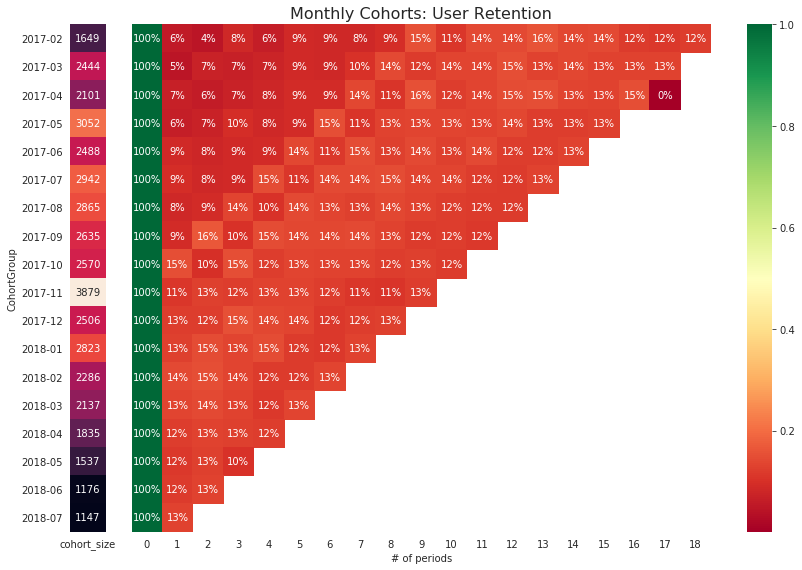

In [10]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 20]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                #cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()


### Retention for a Particular State 

In [14]:
def retention_by_state(state, df):
    
    df = df[df.customer_state == state]

    df_cohort = df.groupby(['CohortGroup', 'OrderMonth']) \
                  .agg(n_customers=('customer_unique_id', 'count')) \
                  .reset_index(drop=False)
    df_cohort['PeriodIndex'] = (df_cohort.OrderMonth - df_cohort.CohortGroup).apply(attrgetter('n'))

    def get_data(df_cohort):
        cohort_pivot = df_cohort.pivot_table(index = 'CohortGroup',
                                         columns = 'PeriodIndex',
                                         values = 'n_customers')
        #cohort_pivot.iloc[:,0]= (cohort_pivot.iloc[:,0].divide(25, axis = 0)).astype(int)
        #cohort_pivot.iloc[:,1:] = cohort_pivot.iloc[:,0:].divide(2, axis = 0)
        cohort_pivot = cohort_pivot.iloc[4:-1,:-5]
        return cohort_pivot

    cohort_pivot_ = get_data(df_cohort)
    cohort_pivot_

    cohort_size = cohort_pivot_.iloc[:,0]
    retention_matrix = cohort_pivot_.divide(cohort_size, axis = 0)

    with sns.axes_style("white"):
        fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 20]})

        # retention matrix
        sns.heatmap(retention_matrix, 
                    mask=retention_matrix.isnull(), 
                    annot=True, 
                    fmt='.0%', 
                    cmap='RdYlGn', 
                    ax=ax[1])
        ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
        ax[1].set(xlabel='# of periods',
                  ylabel='')

        
        # cohort size
        cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
        white_cmap = mcolors.ListedColormap(['white'])
        sns.heatmap(cohort_size_df, 
                    annot=True, 
                    cbar=False, 
                    fmt='g', 
                    #cmap=white_cmap, 
                    ax=ax[0])

        fig.tight_layout()


In [12]:
df.customer_state.unique()

array(['RJ', 'GO', 'MG', 'PR', 'BA', 'PE', 'RS', 'SP', 'CE', 'AL', 'RO',
       'ES', 'SC', 'RN', 'PA', 'DF', 'MA', 'MT', 'PB', 'AP', 'AM', 'PI',
       'TO', 'MS', 'RR', 'SE', 'AC'], dtype=object)

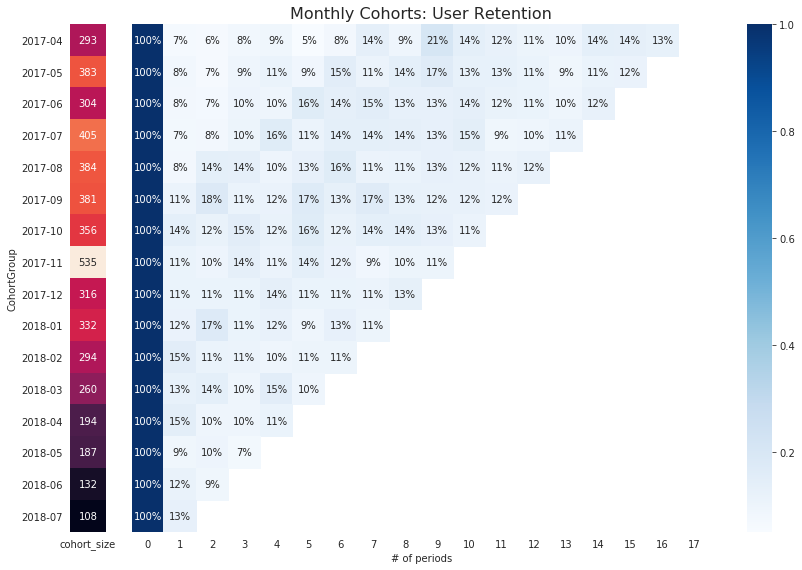

In [15]:
retention_by_state('RJ', df)